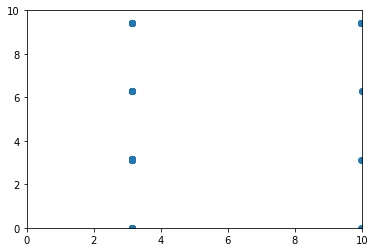

Function Type:f1
Step size:0.01
Mean of Iterations: 278.25
Standard Deviation of Iterations: 175.1139527983035
Iterations: [57, 309, 299, 160, 167, 26, 266, 156, 221, 45, 254, 52, 248, 97, 299, 541, 143, 411, 540, 547, 457, 224, 574, 336, 53, 128, 611, 237, 333, 305, 200, 584, 489, 394, 585, 328, 256, 308, 56, 273, 139, 120, 569, 229, 441, 153, 546, 110, 41, 254, 523, 328, 131, 90, 119, 113, 89, 144, 414, 133, 429, 54, 366, 568, 29, 130, 517, 269, 403, 577, 345, 535, 606, 259, 185, 83, 432, 248, 129, 73, 86, 161, 244, 386, 592, 256, 469, 228, 113, 438, 157, 259, 111, 239, 104, 60, 229, 482, 601, 118]

Mean of Height: 1.8235833036120161
Standard Deviation of Height: 0.5637087681417876
Heights: [0.03987022310014121, 1.9999910838857886, 1.9999866953974557, 1.9999740458001574, 1.9999938488432352, 0.04022132525042599, 1.9999917456592948, 1.9999925615509384, 1.999958539386528, 0.04073461962379521, 1.9999588491749123, 1.9999862375419073, 1.9999569906487173, 1.9999738842886554, 1.9999634864071

In [2]:
from math import sin,cos,fabs
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statistics


def f1(x,y):
    return sin(x/2) + cos(2*y)

def f2(x,y):
    return -fabs(x-2) - fabs(0.5*y + 1) + 3

def generate_random(min,max):
    return random.uniform(min,max)

def find_best(x,y,type,step_size,return_all = False):
    heights = []
    coordinates = []

    # Generate the set of neighbours of Xi,Yi and their Value E(Xi,Yi) 8 of them
    for new_x in [x+step_size, x-step_size,x]:
        if new_x < 0 or new_x > 10:
            continue

        for new_y in [y+step_size, y-step_size, y]:

            if new_y < 0 or new_y > 10:
                continue
            # Calculate the new Heights
            if(type == "f1"):
                current_height = f1(new_x,new_y)
            else:
                current_height = f2(new_x,new_y)

            # Save the new heights with corresponding coordinate
            heights.append(current_height)
            coordinates.append((new_x,new_y))

    # Decide what to return based on the return_all values
    if return_all:
        return coordinates,heights
    else:
        max_height = max(heights)
        max_index = heights.index(max_height)
        x,y = coordinates[max_index]
        return x,y,max_height

def find_all(x,y,type,step_size):
    return find_best(x,y,type,step_size,return_all=True)

def hill_climbing(x,y,type,step_size):
    # Default value
    new_x = -1
    new_y = -1
    iteration = 0
    while not (x == new_x and y == new_y) :
        #print("Iteration : " + str(iteration))
        new_x = x
        new_y = y
        (x,y,height) = find_best(new_x,new_y,type,step_size)
        iteration += 1
    return new_x,new_y,height, iteration

def local_beam_search(type,step_size,beam_width):
    # At first generate beam_width random points
    x = []
    y = []
    for i in range(0,beam_width):
        rand_x = generate_random(0, 10)
        rand_y = generate_random(0, 10)
        x.append(rand_x)
        y.append(rand_y)

    # default value
    old_x = [-1]
    old_y = [-1]
    iteration = 0
    # Iterate until the x and y are the same as the new_x and the new_y
    while not (x == old_x and y == old_y):
        old_x = x
        old_y = y
        all_heights = []
        all_coordinates = []
        # Build all possibilities of heights and coordinates
        for current_x,current_y in zip(x,y):
            current_coordinates,current_heights = find_all(current_x,current_y,type,step_size)
            all_heights = all_heights + current_heights
            all_coordinates = all_coordinates + current_coordinates

        # Choose the best K (beam_width) height and coordinate
        best_heights = []
        x = []
        y = []
        count = 0
        for height, coordinate in sorted(zip(all_heights, all_coordinates),reverse=True):
            if count < beam_width:
                (current_x,current_y) = coordinate
                x.append(current_x)
                y.append(current_y)
                best_heights.append(height)
            else:
                break
            count += 1
        iteration += beam_width # +1 or +beam_width

    # Find the x and y having the maximum height
    max_height = max(best_heights)
    max_index = best_heights.index(max_height)
    x = x[max_index]
    y = y[max_index]
    return x,y,max_height,iteration


# Main

type = "f1"
step_size = 0.01
beam_width = 8
number_repeats = 100
X = []
Y = []
I = []
H = []
for i in range (0,100):
    rand_x = generate_random(0, 10)
    rand_y = generate_random(0, 10)
    best_x, best_y, best_height, iteration = hill_climbing(rand_x,rand_y,type,step_size)
    #best_x, best_y, best_height, iteration = local_beam_search(type,step_size,beam_width)
    X.append(best_x)
    Y.append(best_y)
    I.append(iteration)
    H.append(best_height)


# Plotting code
X = np.asarray(X)
Y = np.asarray(Y)
plt.scatter(X, Y)
plt.xlim([0,10])
plt.ylim([0, 10])
plt.show()

print("Function Type:" +type)
print("Step size:" + str(step_size))
print("Mean of Iterations: " + str(statistics.mean(I)))
print("Standard Deviation of Iterations: " + str(statistics.stdev(I)))
print("Iterations: " + str(I))
print()
print("Mean of Height: " + str(statistics.mean(H)))
print("Standard Deviation of Height: " + str(statistics.stdev(H)))
print("Heights: " + str(H))
#draw_contour(0,10,type)